In [1]:
import sys

sys.path.append('..')

from benchmark.ackley import Ackley
from benchmark.himmelblau import Himmelblau
from benchmark.holder import Holder
from benchmark.rastrigin import Rastrigin
from benchmark.rosenbrock import Rosenbrock
from benchmark.sphere import Sphere
from benchmark.michalewicz import Michalewicz
from benchmark.branin import Branin
from benchmark.eggholder import EggHolder
from benchmark.drop_wave import Drop_Wave
from benchmark.goldstein_price import Goldstein_Price
from benchmark.camel import Camel
from benchmark.levy import Levy
from optims.SBS import SBS
from optims.SBS_particles import SBS_particles
from optims.SBS_hybrid import SBS_hybrid
from optims.SBS_particles_hybrid import SBS_particles_hybrid
from optims.AdaLIPO_E import AdaLIPO_E
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def create_bounds(min, max, dim):
    bounds = [(min, max) for _ in range(dim)]
    return np.array(bounds)

In [3]:
functions = {
            "Michalewicz": [Michalewicz(2), create_bounds(0, np.pi, 2)],
            "Ackley": [Ackley(), create_bounds(-32.768, 32.768, 2)],
            "Branin": [Branin(), np.array([(-5, 10), (0, 15)])],
            "Drop Wave": [Drop_Wave(), create_bounds(-5.12, 5.12, 2)],
            "Egg Holder": [EggHolder(), create_bounds(-512, 512, 2)],
            "Goldstein Price": [Goldstein_Price(), create_bounds(-2, 2, 2)],
            "Himmelblau": [Himmelblau(), create_bounds(-4, 4, 2)],
            "Holder Table": [Holder(), create_bounds(-10, 10, 2)],
            "Rastrigin": [Rastrigin(), create_bounds(-5.12, 5.12, 2)],
            "Rosenbrock": [Rosenbrock(), create_bounds(-3, 3, 2)],
            "Camel": [Camel(), create_bounds(-3, 3, 2)],
            "Levy": [Levy(), create_bounds(-10, 10, 2)],
            "Sphere": [Sphere(), create_bounds(-10, 10, 2)],
        }

In [4]:
import cycler
import matplotlib as mpl

n = len(functions)
color = plt.cm.plasma(np.linspace(0, 1,n))
mpl.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)

In [ ]:
plt.figure(figsize=(10, 5))
#plt.rcParams.update({'font.size': 15})

for f_name in functions.keys():
  bounds = functions[f_name][1]
  sbs = SBS(bounds, 500, [10_000], 300, sigma=1/500**2)
  res_matrix = []
  for _ in range(10):
    res = sbs.optimize(functions[f_name][0], return_best_iter=True)[-1]
    res_matrix.append(res)
  res_mean = np.mean(res_matrix, axis=0)

  plt.plot(range(len(res_mean)), np.array(res_mean) - functions[f_name][0].min, label=f_name)
plt.legend()
plt.yscale("log")
plt.xlabel("SBS iteration")
plt.ylabel("Error (log scale)")
plt.savefig("error_vs_eval_sbs.pdf", bbox_inches="tight")

In [ ]:
plt.figure(figsize=(10, 5))
#plt.rcParams.update({'font.size': 15})

for f_name in functions.keys():
  bounds = functions[f_name][1]
  sbs_pf = SBS_particles(bounds, 500, [10_000], 300, sigma=lambda N: 1 / N**2)
  res_matrix = []
  for _ in range(10):
    res = sbs_pf.optimize(functions[f_name][0], return_best_iter=True)[-1]
    res_matrix.append(res)
  res_mean = np.mean(res_matrix, axis=0)

  plt.plot(range(len(res_mean)), np.array(res_mean) - functions[f_name][0].min, label=f_name)
plt.legend()
plt.yscale("log")
plt.xlabel("SBS-PF iteration")
plt.ylabel("Error (log scale)")
plt.savefig("error_vs_eval_sbs_pf.pdf", bbox_inches="tight")

In [ ]:
plt.figure(figsize=(10, 5))
#plt.rcParams.update({'font.size': 15})

for f_name in functions.keys():
  bounds = functions[f_name][1]
  sbs_hybrid = SBS_hybrid(bounds, 200, [10_000], 1000, sigma=1e-10, warm_start_iter=1000)
  res_matrix = []
  for _ in range(10):
    res = sbs_hybrid.optimize(functions[f_name][0], return_best_iter=True)[-1]
    res_matrix.append(res)
  res_mean = np.mean(res_matrix, axis=0)

  plt.plot(range(len(res_mean)), np.array(res_mean) - functions[f_name][0].min, label=f_name)
plt.legend()
plt.yscale("log")
plt.xlabel("SBS-Hybrid iteration")
plt.ylabel("Error (log scale)")
plt.savefig("error_vs_eval_sbs_hybrid.pdf", bbox_inches="tight")

PF - Best CMA-ES: -1.0. Best WOA: -1.742114508633561.
PF - Initializing particles with WOA.
PF - Best CMA-ES: -1.8013034100985537. Best WOA: -1.7869002288783358.
PF - Initializing particles with CMA-ES.
PF - Best CMA-ES: -1.8013034100985532. Best WOA: -1.795995172333718.
PF - Initializing particles with CMA-ES.
PF - Best CMA-ES: -1.8013034100985532. Best WOA: -1.7443553258468265.
PF - Initializing particles with CMA-ES.
PF - Best CMA-ES: -1.8013034100985532. Best WOA: -1.651227742583304.
PF - Initializing particles with CMA-ES.
PF - Best CMA-ES: -1.8013034100985532. Best WOA: -1.720918542069674.
PF - Initializing particles with CMA-ES.
PF - Best CMA-ES: -1.2140595156208147. Best WOA: -1.7973088664136398.
PF - Initializing particles with WOA.
PF - Best CMA-ES: -1.8013034100985506. Best WOA: -1.6101141720975383.
PF - Initializing particles with CMA-ES.
PF - Best CMA-ES: -1.801303410098553. Best WOA: -1.6853361458946077.
PF - Initializing particles with CMA-ES.
PF - Best CMA-ES: -1.801303

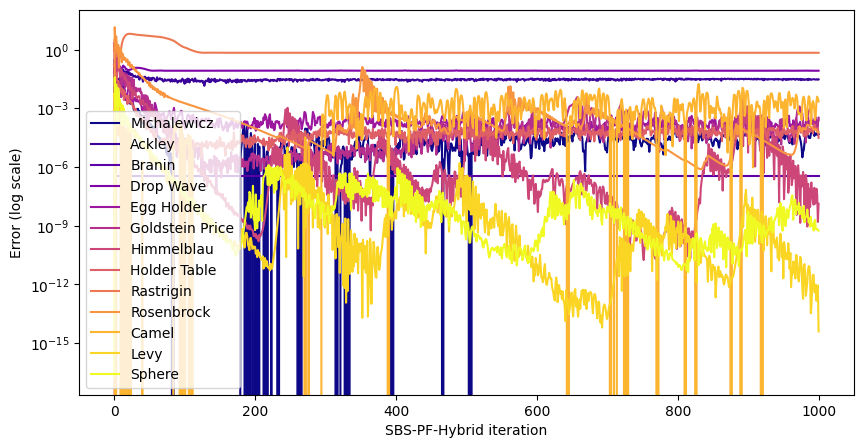

In [5]:
plt.figure(figsize=(10, 5))
#plt.rcParams.update({'font.size': 15})

dc = {}

for f_name in functions.keys():
  bounds = functions[f_name][1]
  sbs_pf_hybrid = SBS_particles_hybrid(bounds, 500, [10_000], 1000, sigma=1e-10, warm_start_iter=1000)
  res_matrix = []
  n_particles_matrix = []
  for _ in range(10):
    n_particles, res = sbs_pf_hybrid.optimize(functions[f_name][0], return_best_iter=True)[-2:]
    res_matrix.append(res)
    n_particles_matrix.append(n_particles)
  res_mean = np.mean(res_matrix, axis=0)
  n_particles_mean = np.mean(n_particles_matrix, axis=0)
  dc[f_name] = n_particles_mean

  plt.plot(range(len(res_mean)), np.array(res_mean) - functions[f_name][0].min, label=f_name)
plt.legend()
plt.yscale("log")
plt.xlabel("SBS-PF-Hybrid iteration")
plt.ylabel("Error (log scale)")
plt.savefig("error_vs_eval_sbs_pf_hybrid.pdf", bbox_inches="tight")

In [8]:
plt.figure(figsize=(10, 5))
#plt.rcParams.update({'font.size': 15})

for f_name in functions.keys():
  bounds = functions[f_name][1]
  ada = AdaLIPO_E(bounds, max_evals=200, max_slope=int(1e10))
  res_matrix = []
  for _ in range(10):
    res = ada.optimize(functions[f_name][0], return_best_iter=True)[-1]
    res_matrix.append(res)
    print("test")
  res_mean = np.mean(res_matrix, axis=0)

  plt.plot(range(len(res_mean)), np.array(res_mean) - functions[f_name][0].min, label=f_name)
plt.legend()
plt.yscale("log")
plt.xlabel("AdaLIPO iteration")
plt.ylabel("Error (log scale)")
plt.savefig("error_vs_eval_adalipo.pdf", bbox_inches="tight")

test


KeyboardInterrupt: 

<Figure size 1000x500 with 0 Axes>